In [4]:
library(ggthemes)
library(ggplot2)

In [5]:
col_day0 = canva_pal("Pool party")(4)[1]
col_day1 = canva_pal("Pool party")(4)[2]
col_day2 = canva_pal("Pool party")(4)[3]
col_day3 = canva_pal("Pool party")(4)[4]

col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

In [6]:
# load sceset
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [7]:
sce

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [11]:
# normalize
sce <- scater::normalize(sce)
# define design matrix with batch structure (experiment)
design <- model.matrix(~experiment, data = colData(sce))
# define highly variable genes
alt.fit <- scran::trendVar(sce, design = design, use.spikes = FALSE)
alt.decomp <- scran::decomposeVar(sce, alt.fit)

Warning message:
“'normalizeSCE' is deprecated.
Use 'logNormCounts' instead.
See help("Deprecated")”Warning message:
“'centreSizeFactors' is deprecated.
See help("Deprecated")”Warning message in .get_all_sf_sets(object):
“spike-in set 'ERCC' should have its own size factors”Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [12]:
# get top 500
top.500.hvgs <- rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),][1:500,])

# get PC1 from expression of the top 500 hvgs
sce_500hvg = sce[rownames(sce) %in% top.500.hvgs,]
p1 = as.data.frame(prcomp(t(logcounts(sce_500hvg)))$x[,1])
colnames(p1) = "PC1_top500hvgs"
head(p1)

,PC1_top500hvgs
21843_1#10,-11.7695261
21843_1#100,5.1315308
21843_1#101,-0.6430211
21843_1#102,-14.5080208
21843_1#103,-5.8029849
21843_1#105,-2.3442226


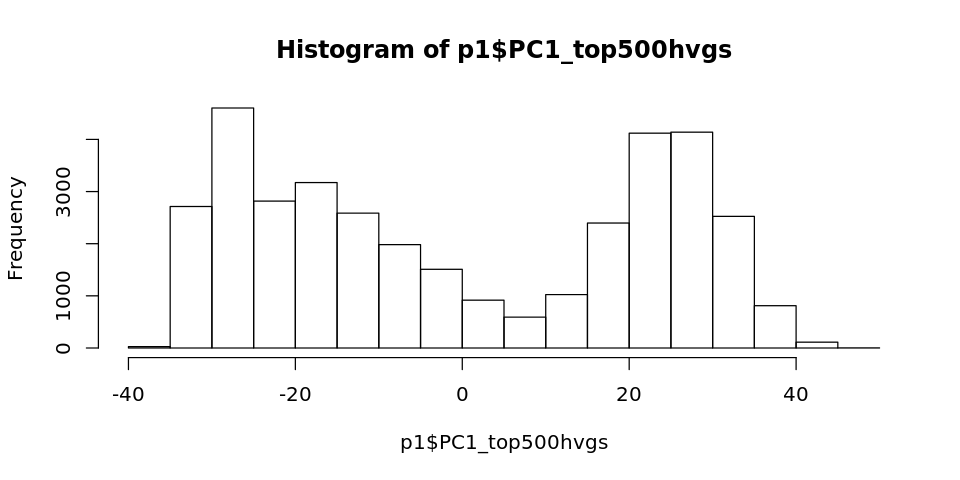

In [13]:
# use as pseudotime
options(repr.plot.width = 8, repr.plot.height = 4) 
hist(p1$PC1_top500hvgs)

In [14]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [15]:
rownames(sce)[grep("NANOG",rownames(sce))]

[1] "ENSG00000111704_NANOG"   "ENSG00000176654_NANOGP1"
[3] "ENSG00000255192_NANOGP8"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


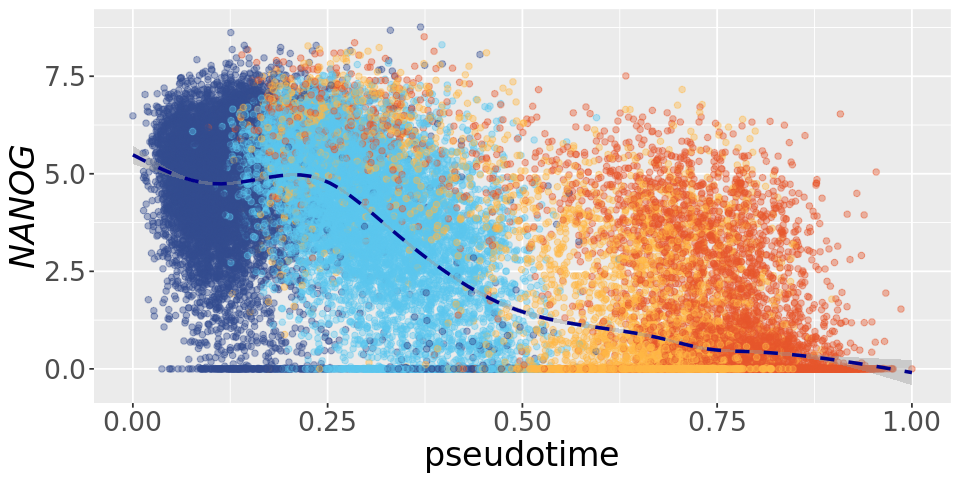

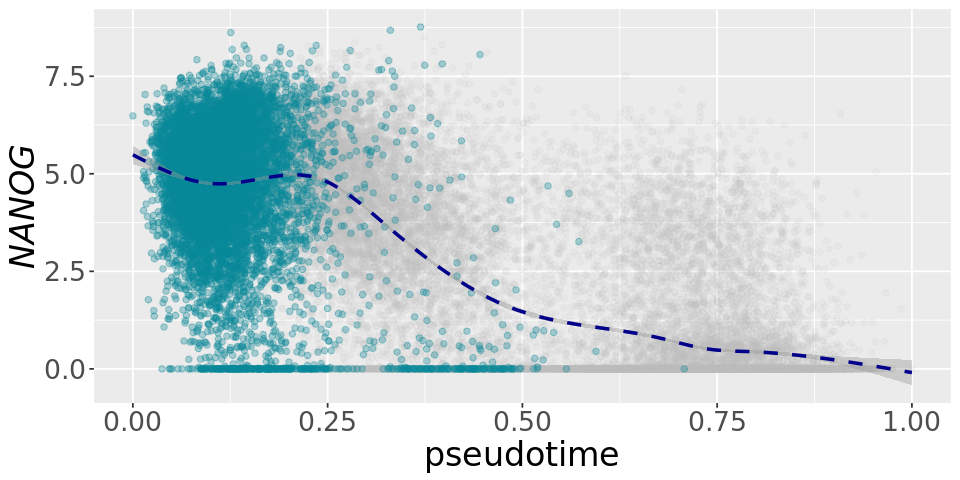

In [16]:
# plot stage definition : iPSC
df = cbind(p1, logcounts(sce)["ENSG00000111704_NANOG",], sce$day)
colnames(df) = c("pseudotime","NANOG","day")
df$scaled_pseudo <- range01(df$pseudotime)

options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df, aes(x = scaled_pseudo, y = NANOG, colour = day)) +
        geom_point(alpha = 0.4)  + xlab("pseudotime") +
        scale_color_canva(palette = "Pool party") + 
        stat_smooth(colour = "darkblue", linetype = 2) + theme(text = element_text(size = 20)) +
        theme(legend.position = "none") + theme(axis.title.y = element_text(face = "italic", size = 20))
ggplot(df, aes(x = scaled_pseudo, y = NANOG, colour = day))  + 
        geom_point(alpha = 0.1, col = "grey")  + xlab("pseudotime") +
#         scale_color_canva(palette = "Pool party") + 
        geom_point(aes(x = scaled_pseudo, y = NANOG), colour = col_ips,
               data = dplyr::filter(df, day %in% c("day0")),
                  alpha = 0.3) + theme(text = element_text(size = 20)) +
        theme(axis.title.y = element_text(face = "italic", size = 20)) + 
        stat_smooth(colour = "darkblue", linetype = 2) 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


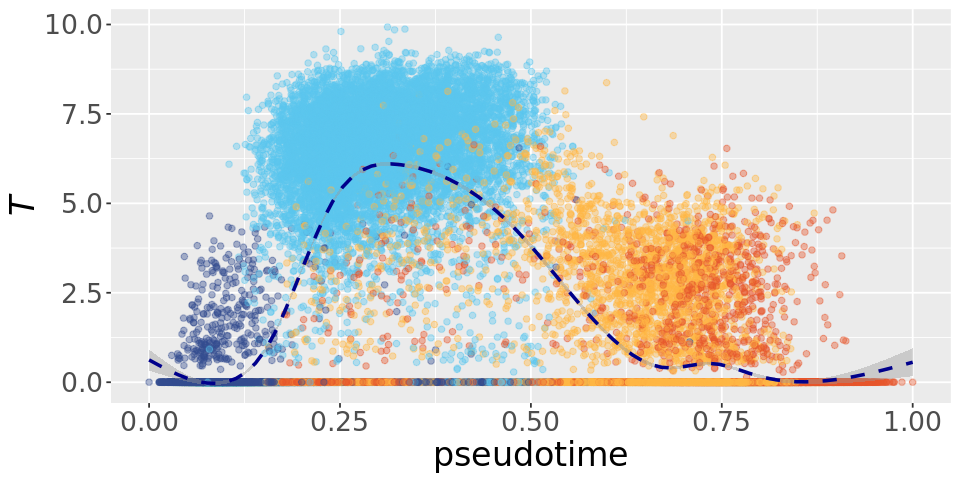

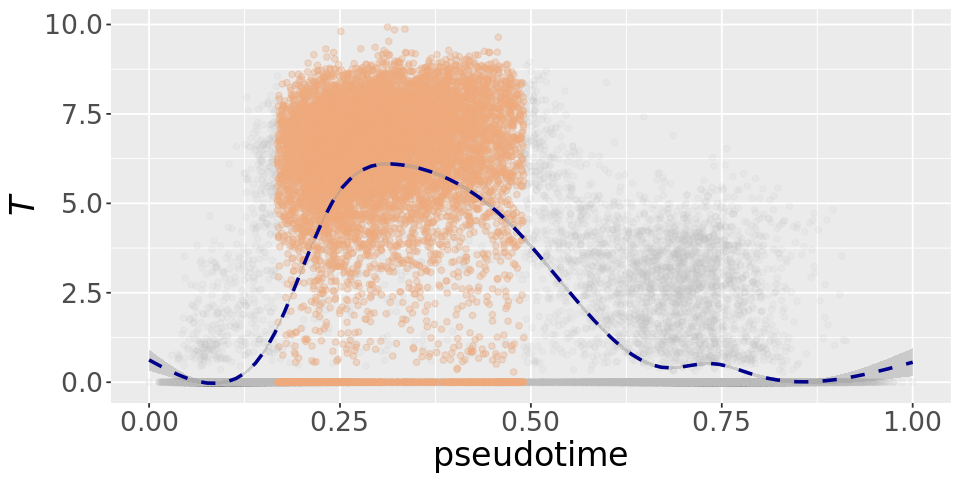

In [17]:
# plot stage definition : mesendo
df = cbind(p1, logcounts(sce)["ENSG00000164458_T",], sce$day)
colnames(df) = c("pseudotime","T","day")
df$scaled_pseudo <- range01(df$pseudotime)

options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df, aes(x = scaled_pseudo, y = T, colour = day)) +
        geom_point(alpha = 0.4)  + xlab("pseudotime") +
        scale_color_canva(palette = "Pool party") + 
        stat_smooth(colour = "darkblue", linetype = 2) + theme(text = element_text(size = 20)) +
        theme(legend.position = "none") + theme(axis.title.y = element_text(face = "italic", size = 20))
ggplot(df, aes(x = scaled_pseudo, y = T, colour = day))  + 
        geom_point(alpha = 0.1, col = "grey")  + xlab("pseudotime") +
#         scale_color_canva(palette = "Pool party") + 
        geom_point(aes(x = scaled_pseudo, y = T), colour = col_mesendo,
               data = dplyr::filter(df, pseudotime > -23 & pseudotime < 4, day %in% c("day1","day2")),
                  alpha = 0.3) + theme(text = element_text(size = 20)) +
        theme(axis.title.y = element_text(face = "italic", size = 20)) + 
        stat_smooth(colour = "darkblue", linetype = 2) 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


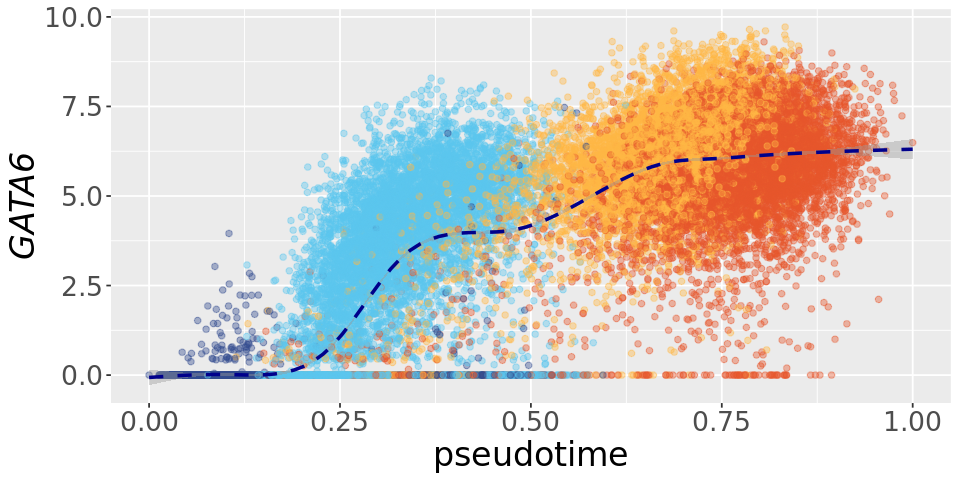

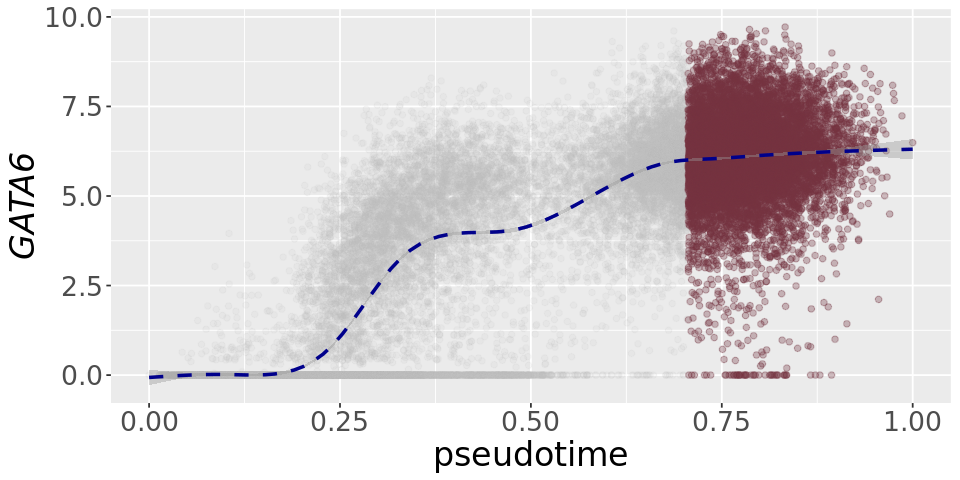

In [18]:
# plot stage definition : defendo
df = cbind(p1, logcounts(sce)["ENSG00000141448_GATA6",], sce$day)
colnames(df) = c("pseudotime","GATA6","day")
df$scaled_pseudo <- range01(df$pseudotime)

options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df, aes(x = scaled_pseudo, y = GATA6, colour = day)) +
        geom_point(alpha = 0.4) + xlab("pseudotime") + theme(text = element_text(size = 20)) +
        scale_color_canva(palette = "Pool party") + theme(axis.title.y = element_text(face = "italic", size = 20)) +
        stat_smooth(colour = "darkblue", linetype = 2) + theme(legend.position = "none")
ggplot(df, aes(x = scaled_pseudo, y = GATA6, colour = day)) + 
        geom_point(alpha = 0.1, col = "grey") + xlab("pseudotime")   + 
        geom_point(aes(x = scaled_pseudo, y = GATA6), colour = col_defendo,
               data = dplyr::filter(df, pseudotime >  22, day %in% c("day2","day3")),
                  alpha = 0.3) + theme(text = element_text(size = 20)) +
        stat_smooth(colour = "darkblue", linetype = 2) + theme(axis.title.y = element_text(face = "italic", size = 20))